In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/GoogleDrive')

Mounted at /content/GoogleDrive


In [3]:
data_dir='/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data'

In [4]:
os.listdir(data_dir)

['test', 'validation', 'training']

In [5]:
test_path=data_dir+'/test/'
train_path=data_dir+'/training/'
val_path=data_dir+'/validation/'

In [6]:
os.listdir(train_path)

['steak', 'spring_rolls', 'pizza', 'onion_rings', 'donuts']

In [7]:
os.listdir(val_path)

['steak', 'spring_rolls', 'pizza', 'onion_rings', 'donuts']

In [8]:
os.listdir(test_path)

['steak', 'spring_rolls', 'pizza', 'onion_rings', 'donuts']

In [9]:
train_steak_image_list=os.listdir(train_path+'steak')
train_donuts_image_list=os.listdir(train_path+'donuts')
train_pizza_image_list=os.listdir(train_path+'pizza')
train_onion_image_list=os.listdir(train_path+'onion_rings')
train_spring_image_list=os.listdir(train_path+'spring_rolls')

In [10]:
val_steak_image_list=os.listdir(val_path+'steak')
val_donuts_image_list=os.listdir(val_path+'donuts')
val_pizza_image_list=os.listdir(val_path+'pizza')
val_onion_image_list=os.listdir(val_path+'onion_rings')
val_spring_image_list=os.listdir(val_path+'spring_rolls')

In [11]:
test_steak_image_list=os.listdir(test_path+'steak')
test_donuts_image_list=os.listdir(test_path+'donuts')
test_pizza_image_list=os.listdir(test_path+'pizza')
test_onion_image_list=os.listdir(test_path+'onion_rings')
test_spring_image_list=os.listdir(test_path+'spring_rolls')

In [49]:
print("spring rolls training: ", len(train_spring_image_list), "images")
print("pizza training: ", len(train_pizza_image_list), "images")
print("onion rings training: ", len(train_onion_image_list), "images")
print("donuts training: ", len(train_donuts_image_list), "images")
print("steak training: ", len(train_steak_image_list), "images")

spring rolls training:  700 images
pizza training:  700 images
onion rings training:  700 images
donuts training:  700 images
steak training:  699 images


In [50]:
print("spring rolls: ", len(test_spring_image_list), "images")
print("pizza: ", len(test_pizza_image_list), "images")
print("onion rings : ", len(test_onion_image_list), "images")
print("donuts: ", len(test_donuts_image_list), "images")
print("steak: ", len(test_steak_image_list), "images")

spring rolls:  100 images
pizza:  100 images
onion rings :  100 images
donuts:  100 images
steak:  100 images


In [51]:
print("spring rolls training: ", len(val_spring_image_list), "images")
print("pizza training: ", len(val_pizza_image_list), "images")
print("onion rings training: ", len(val_onion_image_list), "images")
print("donuts training: ", len(val_donuts_image_list), "images")
print("steak training: ", len(val_steak_image_list), "images")

spring rolls training:  200 images
pizza training:  200 images
onion rings training:  200 images
donuts training:  200 images
steak training:  200 images


In [12]:
train_steak=train_path+'steak/'+train_steak_image_list[0]
print(train_steak)

/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/training/steak/3556871.jpg


In [13]:
imread(train_steak).shape

(512, 512, 3)

In [14]:
train_springroll = train_path + 'spring_rolls/' + train_spring_image_list[0]
print(train_springroll)

train_pizza = train_path + 'pizza/' + train_pizza_image_list[0]
print(train_pizza)

train_onionrings = train_path + 'onion_rings/' + train_onion_image_list[0]
print(train_onionrings)

train_donuts = train_path + 'donuts/' + train_donuts_image_list[0]
print(train_donuts)

train_steak = train_path + 'steak/' + train_steak_image_list[0]
print(train_steak)

/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/training/spring_rolls/2025347.jpg
/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/training/pizza/2671508.jpg
/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/training/onion_rings/3696446.jpg
/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/training/donuts/2983246.jpg
/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/training/steak/3556871.jpg


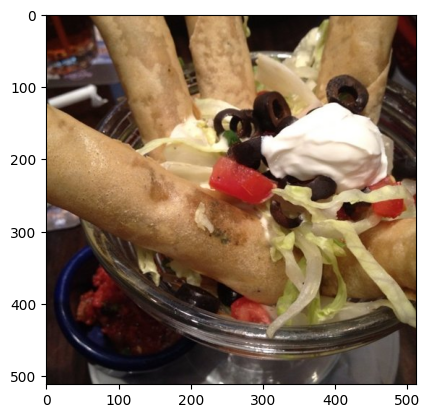

In [55]:
train_springroll_array = imread(train_springroll)
plt.imshow(train_springroll_array)

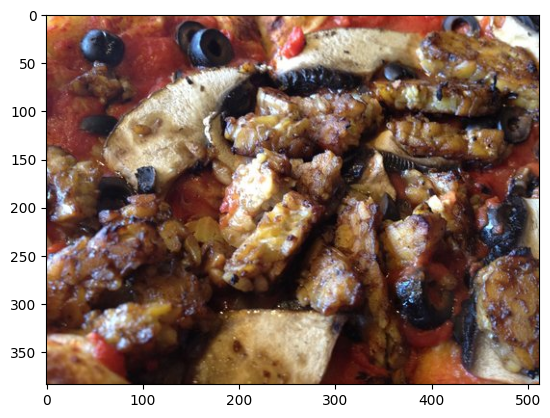

In [56]:
train_pizza_array = imread(train_pizza)
plt.imshow(train_pizza_array)

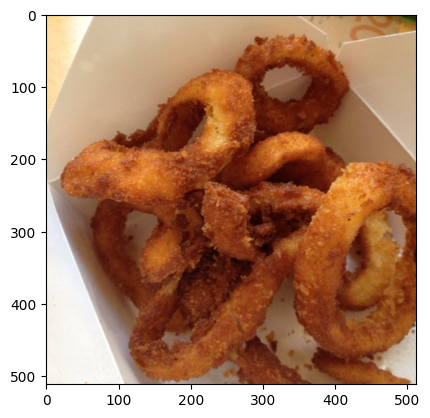

In [57]:
train_onionrings_array = imread(train_onionrings)
plt.imshow(train_onionrings_array)

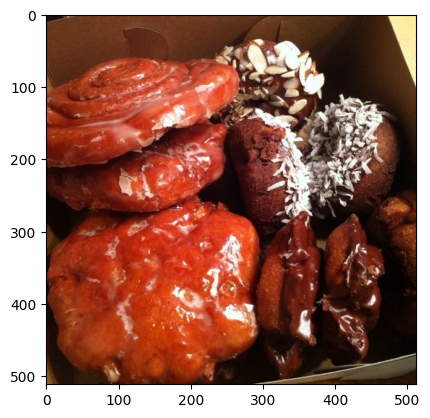

In [58]:
train_donuts_array = imread(train_donuts)
plt.imshow(train_donuts_array)

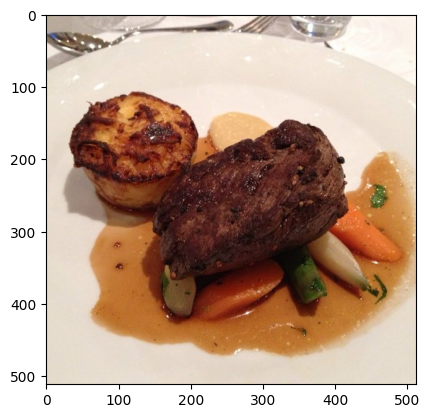

In [59]:
train_steak_array = imread(train_steak)
plt.imshow(train_steak_array)

In [60]:
image_dim1 = []
image_dim2 = []
for image_filename in train_steak_image_list:
  img = imread(train_path + 'steak/' + image_filename)
  d1,d2,colors = img.shape

  image_dim1.append(d1)
  image_dim2.append(d2)
print(np.mean(image_dim1))
print(np.mean(image_dim2))

470.08583690987126
500.0171673819743


In [61]:
image_dim1 = []
image_dim2 = []
for image_filename in train_pizza_image_list:
  img = imread(train_path + 'pizza/' + image_filename)
  d1,d2,colors = img.shape
  image_dim1.append(d1)
  image_dim2.append(d2)
print(np.mean(image_dim1))
print(np.mean(image_dim2))

472.01
491.7342857142857


In [62]:
image_dim1 = []
image_dim2 = []
for image_filename in train_spring_image_list:
  img = imread(train_path + 'spring_rolls/' + image_filename)
  d1,d2,colors = img.shape
  image_dim1.append(d1)
  image_dim2.append(d2)
print(np.mean(image_dim1))
print(np.mean(image_dim2))

477.54285714285714
498.28285714285715


In [63]:
image_dim1 = []
image_dim2 = []
for image_filename in train_donuts_image_list:
  img = imread(train_path + 'donuts/' + image_filename)
  d1,d2,colors = img.shape
  image_dim1.append(d1)
  image_dim2.append(d2)
print(np.mean(image_dim1))
print(np.mean(image_dim2))

472.68142857142857
491.8985714285714


In [64]:
image_dim1 = []
image_dim2 = []
for image_filename in train_onion_image_list:
  img = imread(train_path + 'onion_rings/' + image_filename)
  d1,d2,colors = img.shape
  image_dim1.append(d1)
  image_dim2.append(d2)
print(np.mean(image_dim1))
print(np.mean(image_dim2))

484.39428571428573
489.30571428571426


In [15]:
image_gen = ImageDataGenerator (rotation_range=20,
                                width_shift_range=0.10,
                                height_shift_range=0.10,
                                shear_range=0.1,
                                zoom_range=0.1,
                                horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1/255,
                                fill_mode='nearest')

In [16]:
image_gen.flow_from_directory(train_path)

Found 3499 images belonging to 5 classes.


In [17]:
image_gen.flow_from_directory(val_path)

Found 1000 images belonging to 5 classes.


In [18]:
image_gen.flow_from_directory(test_path)

Found 500 images belonging to 5 classes.


# **Model**

In [19]:
image_shape=(490, 490, 3)

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#model.add(Dense(64, activation='relu'))

model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 488, 488, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 244, 244, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 242, 242, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 121, 121, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 59, 59, 128)       0

In [31]:
batch_size=100

In [32]:
train_image_gen=image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size)

Found 3499 images belonging to 5 classes.


In [33]:
val_image_gen=image_gen.flow_from_directory(val_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size)

Found 1000 images belonging to 5 classes.


In [68]:
test_image_gen=image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',batch_size=10)

Found 500 images belonging to 5 classes.


In [25]:
train_image_gen.class_indices

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
warnings.filterwarnings('ignore')

In [35]:
results = model.fit_generator(train_image_gen, epochs = 30,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Epoch 1/30
35/35 [==============================] - 999s 29s/step - loss: 0.5030 - accuracy: 0.8105 - val_loss: 0.6755 - val_accuracy: 0.7690
Epoch 2/30
35/35 [==============================] - 330s 9s/step - loss: 0.4191 - accuracy: 0.8460 - val_loss: 0.6848 - val_accuracy: 0.7750
Epoch 3/30
35/35 [==============================] - 329s 9s/step - loss: 0.4048 - accuracy: 0.8522 - val_loss: 0.6786 - val_accuracy: 0.7580


In [36]:
results = model.fit_generator(train_image_gen,
                              initial_epoch=3,
                              epochs=30,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Epoch 4/30
35/35 [==============================] - 334s 9s/step - loss: 0.4094 - accuracy: 0.8488 - val_loss: 0.6815 - val_accuracy: 0.7550
Epoch 5/30
35/35 [==============================] - 330s 9s/step - loss: 0.3892 - accuracy: 0.8517 - val_loss: 0.6686 - val_accuracy: 0.7840
Epoch 6/30
35/35 [==============================] - 329s 9s/step - loss: 0.3700 - accuracy: 0.8685 - val_loss: 0.7036 - val_accuracy: 0.7630
Epoch 7/30
35/35 [==============================] - 331s 9s/step - loss: 0.3851 - accuracy: 0.8654 - val_loss: 0.7127 - val_accuracy: 0.7650


In [121]:
results = model.fit_generator(train_image_gen,
                              initial_epoch=9,
                              epochs=30,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Epoch 10/30
35/35 [==============================] - 339s 10s/step - loss: 0.5154 - accuracy: 0.8142 - val_loss: 0.6687 - val_accuracy: 0.7590
Epoch 11/30
35/35 [==============================] - 332s 9s/step - loss: 0.5083 - accuracy: 0.8077 - val_loss: 0.6995 - val_accuracy: 0.7660
Epoch 12/30
35/35 [==============================] - 332s 9s/step - loss: 0.5350 - accuracy: 0.8002 - val_loss: 0.7114 - val_accuracy: 0.7540


In [122]:
results = model.fit_generator(train_image_gen,
                              initial_epoch=13,
                              epochs=30,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Epoch 14/30
35/35 [==============================] - 338s 10s/step - loss: 0.5027 - accuracy: 0.8134 - val_loss: 0.7904 - val_accuracy: 0.7250
Epoch 15/30
35/35 [==============================] - 332s 9s/step - loss: 0.5413 - accuracy: 0.7991 - val_loss: 0.6922 - val_accuracy: 0.7610
Epoch 16/30
35/35 [==============================] - 335s 10s/step - loss: 0.4835 - accuracy: 0.8177 - val_loss: 0.7136 - val_accuracy: 0.7710
Epoch 17/30
35/35 [==============================] - 333s 9s/step - loss: 0.4825 - accuracy: 0.8199 - val_loss: 0.7256 - val_accuracy: 0.7580


In [126]:
results = model.fit_generator(train_image_gen,
                              initial_epoch=28,
                              epochs=30,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Epoch 29/30
35/35 [==============================] - 340s 10s/step - loss: 0.4651 - accuracy: 0.8302 - val_loss: 0.7089 - val_accuracy: 0.7790
Epoch 30/30
35/35 [==============================] - 333s 9s/step - loss: 0.4367 - accuracy: 0.8382 - val_loss: 0.7337 - val_accuracy: 0.7580


In [127]:
results = model.fit_generator(val_image_gen,
                              epochs=3,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Epoch 1/3
10/10 [==============================] - 143s 15s/step - loss: 0.7710 - accuracy: 0.7380 - val_loss: 0.6358 - val_accuracy: 0.7640
Epoch 2/3
10/10 [==============================] - 138s 14s/step - loss: 0.6897 - accuracy: 0.7510 - val_loss: 0.6047 - val_accuracy: 0.7800
Epoch 3/3
10/10 [==============================] - 138s 14s/step - loss: 0.6492 - accuracy: 0.7740 - val_loss: 0.5373 - val_accuracy: 0.7920


In [82]:
#results = model.fit_generator(train_image_gen,
                              #initial_epoch=4,
                              #epochs=30,
                              #validation_data=val_image_gen,
                              #callbacks=[early_stop])

# **Evaluation**

In [37]:
trainingHistory=pd.DataFrame(model.history.history)

<Axes: >

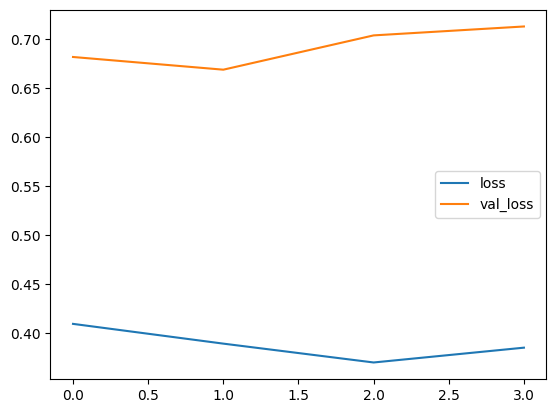

In [38]:
trainingHistory[['loss','val_loss']].plot()

<Axes: >

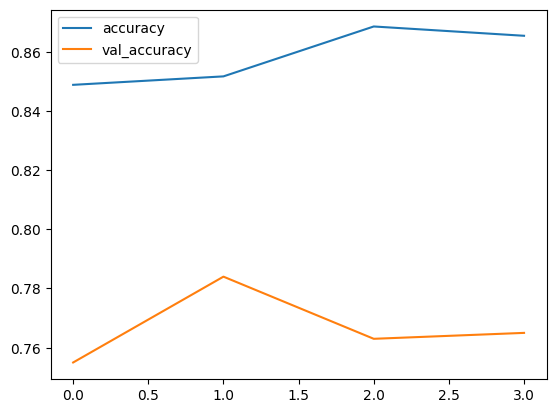

In [39]:
trainingHistory[['accuracy','val_accuracy']].plot()

In [29]:
#model.save_weights('/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_weights')
model.load_weights('/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_weights')

In [144]:
model.save('/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_model')
mode

In [41]:
HistDF=pd.DataFrame(trainingHistory)

In [42]:
HistDF

loss  accuracy  val_loss  val_accuracy
0  0.409381  0.848814  0.681540         0.755
1  0.389234  0.851672  0.668595         0.784
2  0.370013  0.868534  0.703564         0.763
3  0.385118  0.865390  0.712653         0.765

In [ ]:
#

In [69]:
print(model.metrics_names)
print(model.evaluate_generator(val_image_gen))

['loss', 'accuracy']
[0.7204726934432983, 0.7639999985694885]


In [70]:
print(model.metrics_names)
print(model.evaluate_generator(test_image_gen))

['loss', 'accuracy']
[0.834902286529541, 0.7419999837875366]


In [71]:
test_pred_probabilities=model.predict_generator(test_image_gen)

In [72]:
print(test_image_gen.class_indices)
print(test_image_gen.classes)

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [73]:
print(np.round(test_pred_probabilities,3))

[[0.001 0.99  0.    0.009 0.   ]
 [0.    0.    0.    0.004 0.996]
 [0.025 0.908 0.031 0.033 0.002]
 ...
 [0.127 0.873 0.    0.    0.   ]
 [0.132 0.743 0.002 0.123 0.   ]
 [0.001 0.009 0.    0.983 0.006]]


## Test Classification Report

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
test_predictions = np.argmax(test_pred_probabilities, axis=1)

In [76]:
print(classification_report(test_image_gen.classes,test_predictions))

              precision    recall  f1-score   support

           0       0.21      0.17      0.19       100
           1       0.21      0.21      0.21       100
           2       0.23      0.18      0.20       100
           3       0.18      0.26      0.21       100
           4       0.18      0.17      0.18       100

    accuracy                           0.20       500
   macro avg       0.20      0.20      0.20       500
weighted avg       0.20      0.20      0.20       500



## Confusion Matrix

In [77]:
confusion_matrix(test_image_gen.classes,test_predictions)

array([[17, 23, 13, 25, 22],
       [15, 21, 16, 32, 16],
       [19, 17, 18, 24, 22],
       [19, 21, 18, 26, 16],
       [12, 20, 13, 38, 17]])

# **Model Testing**

In [ ]:
#To test the model we need to do the following:
# 1- convert the image to an array which will have a shape of (490,490,3)
# 2- change the shape to be (1,490,490,3) to fit the shape of the tensor expected by the model because
# the model take images arrays in batches which is the first dim. here we give it one image only

In [85]:
test_steak=test_path+'steak/'+os.listdir(test_path+'steak')[8]
test_steak

'/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/test/steak/345734.jpg'

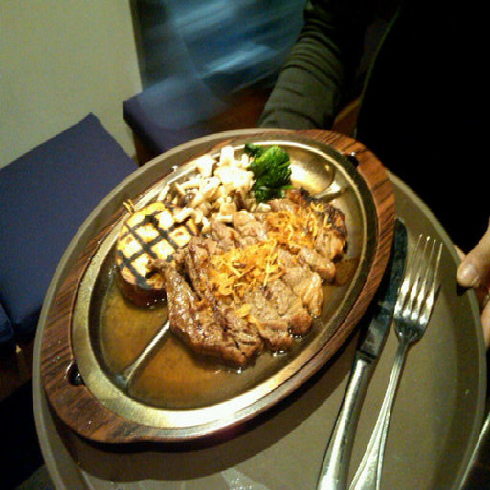

In [86]:
test_steak_image=image.load_img(test_steak,target_size=image_shape)
test_steak_image

In [87]:
test_steak_image=image.img_to_array(test_steak_image)
print(test_steak_image.shape)
test_steak_image=np.expand_dims(test_steak_image, axis=0)
print(test_steak_image.shape)

(490, 490, 3)
(1, 490, 490, 3)


In [105]:
test_image_gen.class_indices

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}

In [88]:
# Use the model to predict the class for this one image
print(model.predict(test_steak_image)) #predicted randomly selected image of steak correctly

1/1 [==============================] - 0s 52ms/step
[[0. 0. 0. 0. 1.]]


In [89]:
test_pizza=test_path+'pizza/'+os.listdir(test_path+'pizza')[6]
test_pizza

'/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/test/pizza/474493.jpg'

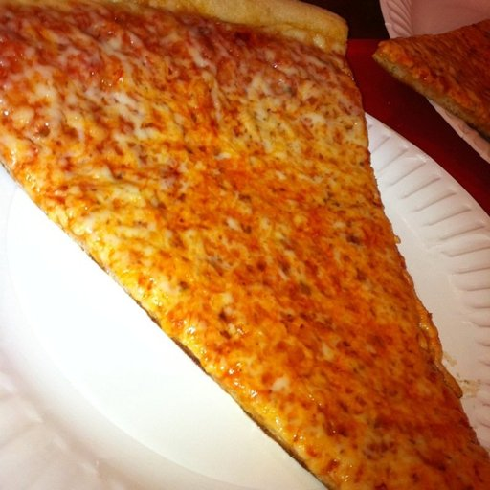

In [90]:
test_pizza_image=image.load_img(test_pizza,target_size=image_shape)
test_pizza_image

In [91]:
test_pizza_image=image.img_to_array(test_pizza_image) # Step 1 above
print(test_pizza_image.shape)
test_pizza_image=np.expand_dims(test_pizza_image, axis=0) # Step 2 above
print(test_pizza_image.shape)

(490, 490, 3)
(1, 490, 490, 3)


In [106]:
test_image_gen.class_indices

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}

In [92]:
print(model.predict(test_pizza_image)) #predicted randomly selected image of pizza correctly

1/1 [==============================] - 0s 67ms/step
[[0. 0. 1. 0. 0.]]


In [101]:
test_donuts=test_path+'donuts/'+os.listdir(test_path+'donuts')[21]
test_donuts

'/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/test/donuts/312767.jpg'

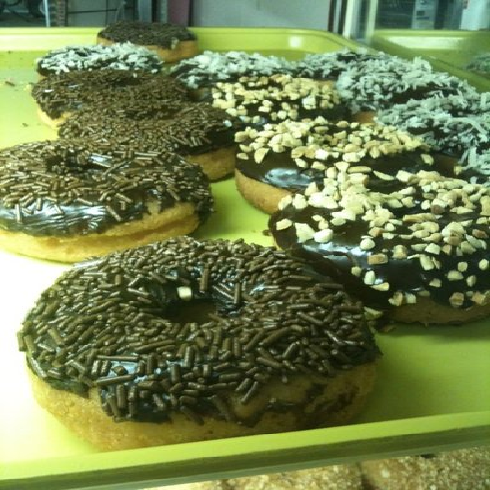

In [102]:
test_donuts_image=image.load_img(test_donuts,target_size=image_shape)
test_donuts_image

In [103]:
test_donuts_image=image.img_to_array(test_donuts_image) # Step 1 above
print(test_donuts_image.shape)
test_donuts_image=np.expand_dims(test_donuts_image, axis=0) # Step 2 above
print(test_donuts_image.shape)

(490, 490, 3)
(1, 490, 490, 3)


In [107]:
test_image_gen.class_indices

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}

In [104]:
print(model.predict(test_donuts_image)) #predicted randomly selected image of donut correctly

1/1 [==============================] - 0s 58ms/step
[[1. 0. 0. 0. 0.]]


In [108]:
test_springroll=test_path+'spring_rolls/'+os.listdir(test_path+'spring_rolls')[0]
test_springroll

'/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/test/spring_rolls/508363.jpg'

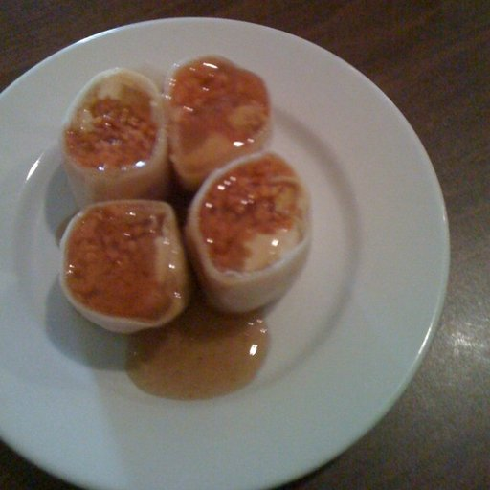

In [109]:
test_spring_image=image.load_img(test_springroll,target_size=image_shape)
test_spring_image

In [110]:
test_spring_image=image.img_to_array(test_spring_image)
print(test_spring_image.shape)
test_spring_image=np.expand_dims(test_spring_image, axis=0)
print(test_spring_image.shape)

(490, 490, 3)
(1, 490, 490, 3)


In [111]:
test_image_gen.class_indices

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}

In [112]:
print(model.predict(test_spring_image)) #predicted randomly selected image of spring rolls correctly

1/1 [==============================] - 0s 62ms/step
[[0. 0. 0. 1. 0.]]


In [113]:
test_onionring=test_path+'onion_rings/'+os.listdir(test_path+'onion_rings')[17]
test_onionring

'/content/GoogleDrive/MyDrive/CS_696_Final_Project/final_project_data/test/onion_rings/962738.jpg'

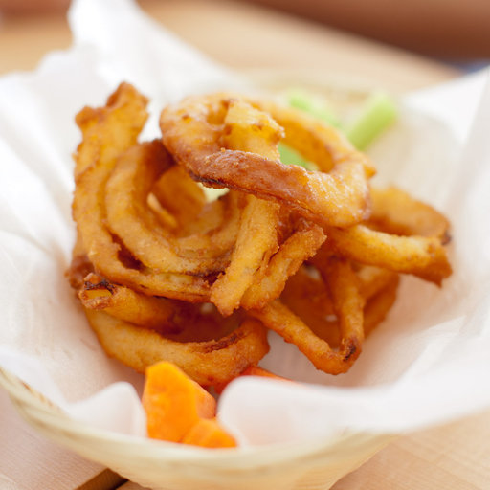

In [114]:
test_onion_image=image.load_img(test_onionring,target_size=image_shape)
test_onion_image

In [115]:
test_onion_image=image.img_to_array(test_onion_image)
print(test_onion_image.shape)
test_onion_image=np.expand_dims(test_onion_image, axis=0)
print(test_onion_image.shape)

(490, 490, 3)
(1, 490, 490, 3)


In [116]:
test_image_gen.class_indices

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}

In [117]:
print(model.predict(test_onion_image)) #predicted randomly selected image of spring rolls incorrectly

1/1 [==============================] - 0s 53ms/step
[[1.0000000e+00 2.8923607e-37 0.0000000e+00 0.0000000e+00 2.0097589e-27]]
